<a href="https://colab.research.google.com/github/StefanoBergia/Tensorflow/blob/main/ANN_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0, x_test /255.0
print("x_train.shape",x_train.shape)

x_train.shape (60000, 28, 28)


In [3]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128,activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10,activation='softmax')                            
])

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3001 - accuracy: 0.9129 - val_loss: 0.1532 - val_accuracy: 0.9540
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1458 - accuracy: 0.9571 - val_loss: 0.1004 - val_accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1106 - accuracy: 0.9671 - val_loss: 0.0917 - val_accuracy: 0.9716
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0908 - accuracy: 0.9719 - val_loss: 0.0771 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0787 - accuracy: 0.9753 - val_loss: 0.0730 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0679 - accuracy: 0.9790 - val_loss: 0.0684 - val_accuracy: 0.9791
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0599 - accuracy: 0.9804 - val_loss: 0.0733 - val_accuracy:

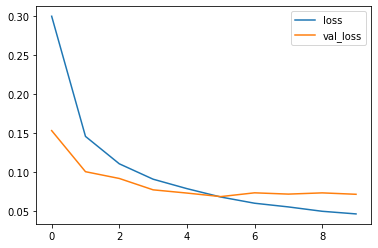

In [6]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

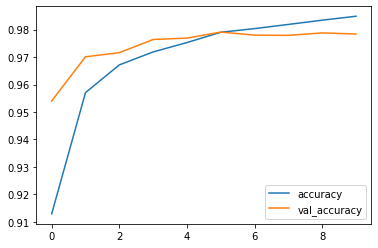

In [7]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [8]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9784
[0.07141292095184326, 0.9783999919891357]


confusion matrix without normalization
[[ 971    0    2    0    1    0    2    1    3    0]
 [   0 1118    3    2    0    0    2    1    9    0]
 [   0    0 1016    5    0    0    2    5    4    0]
 [   0    1    2  991    0    4    0    4    4    4]
 [   1    0    5    1  950    0    3    2    2   18]
 [   2    0    0   10    2  867    3    2    4    2]
 [   4    3    2    1    2    4  938    0    4    0]
 [   1    4   12    5    0    0    0  997    4    5]
 [   3    0    3    3    1    4    1    2  953    4]
 [   2    2    0    6    8    2    1    3    2  983]]


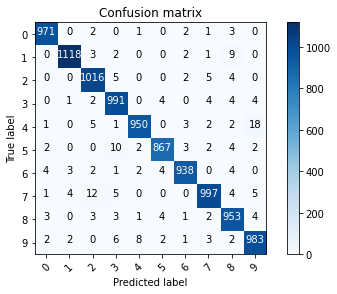

In [10]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float') /cm.sum(axis=1)[:,np.newaxis]
    print("normalized confusion matrix")
  else:
    print("confusion matrix without normalization")
  
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize else 'd'
  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  
p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'True label: 3 Predicted: 8')

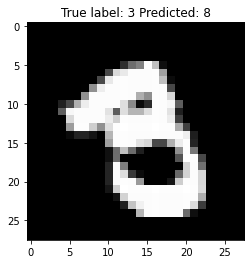

In [14]:
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i],p_test[i]))